In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [ ]:
dir_results = 'retrained_models/metrics'
flist       = glob.glob(f'{dir_results}/*.csv')
dir_results_p2 = '../step2_retrain_part2/retrained_models/metrics'
flist_p2       = glob.glob(f'{dir_results_p2}/*.csv')
flist = [*flist, *flist_p2]

RESULTS={}
for k, kf in enumerate(flist): # kf = f_csv
    RESULTS[k] = {}
    RESULTS[k]['lot'] = kf.split('_')[-3]
    RESULTS[k]['trial'] =  kf.split('_')[-2] + '_' +  kf.split('_')[-1].split('.')[0]
    RESULTS[k]['fn'] = kf.split('/')[-1]

    # collect csv data
    work = pd.read_csv(kf)
    RESULTS[k]['val_loss'] = work['val_loss'].to_numpy()
    RESULTS[k]['min_val_loss'] = work['val_loss'].min()
    RESULTS[k]['epoch'] = work['epoch']
        

In [ ]:
RESULTS_PD = pd.DataFrame(RESULTS).transpose()
RESULTS_PD = RESULTS_PD.sort_values('min_val_loss')

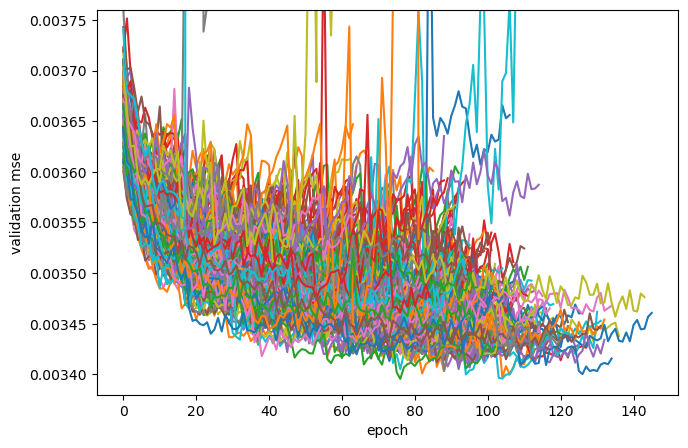

In [43]:
# Showing all top models

fig, ax = plt.subplots()
for k in RESULTS.keys():
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    if False:
        ind_resume = plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-1]
        ax.axvline(ind_resume, color='k', ls='--')
    
ax.set_xlabel('epoch')
ax.set_ylabel('validation mse')
ax.set_ylim(0.00338,0.00376)
fig.set_size_inches(7.5,5)

In [44]:
# save top models after step2 retraining
with open('top_models_after_step2.csv', 'w') as f:
    for krank in range(160):
        plotdata = RESULTS_PD.iloc[krank]
        min_epoch = np.argmin(plotdata['val_loss'])
        # which phase?
        which_phase = (plotdata['epoch'].loc[ plotdata['epoch'] ==0 ].index <= min_epoch).sum()
        fn = f"backup_phase-{which_phase}_retrained_models/"+\
             f"step2_{plotdata['lot']}_{plotdata['trial']}.best.h5"
        # write
        f.write(f'{krank+1}, {fn}\n')

Rank1,	backup_phase-7_retrained_models/step2_lot-147_trial_0027.best.h5
Rank2,	backup_phase-9_retrained_models/step2_lot-87_trial_0050.best.h5
Rank3,	backup_phase-9_retrained_models/step2_lot-101_trial_0028.best.h5
Rank4,	backup_phase-9_retrained_models/step2_lot-171_trial_0047.best.h5
Rank5,	backup_phase-7_retrained_models/step2_lot-91_trial_0024.best.h5
Rank6,	backup_phase-7_retrained_models/step2_lot-64_trial_0031.best.h5
Rank7,	backup_phase-7_retrained_models/step2_lot-177_trial_0024.best.h5
Rank8,	backup_phase-9_retrained_models/step2_lot-126_trial_0035.best.h5
Rank9,	backup_phase-7_retrained_models/step2_lot-173_trial_0047.best.h5
Rank10,	backup_phase-6_retrained_models/step2_lot-108_trial_0040.best.h5
Rank11,	backup_phase-8_retrained_models/step2_lot-51_trial_0042.best.h5
Rank12,	backup_phase-9_retrained_models/step2_lot-96_trial_0021.best.h5
Rank13,	backup_phase-7_retrained_models/step2_lot-42_trial_0040.best.h5
Rank14,	backup_phase-8_retrained_models/step2_lot-138_trial_0031.b

/tmp/ipykernel_111143/1993597320.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Rank21,	backup_phase-9_retrained_models/step2_lot-21_trial_0034.best.h5
Rank22,	backup_phase-7_retrained_models/step2_lot-95_trial_0033.best.h5
Rank23,	backup_phase-5_retrained_models/step2_lot-58_trial_0055.best.h5
Rank24,	backup_phase-3_retrained_models/step2_lot-106_trial_0038.best.h5
Rank25,	backup_phase-5_retrained_models/step2_lot-91_trial_0026.best.h5
Rank26,	backup_phase-7_retrained_models/step2_lot-171_trial_0058.best.h5
Rank27,	backup_phase-7_retrained_models/step2_lot-170_trial_0059.best.h5
Rank28,	backup_phase-9_retrained_models/step2_lot-168_trial_0040.best.h5
Rank29,	backup_phase-9_retrained_models/step2_lot-123_trial_0049.best.h5
Rank30,	backup_phase-9_retrained_models/step2_lot-109_trial_0027.best.h5
Rank31,	backup_phase-9_retrained_models/step2_lot-146_trial_0027.best.h5
Rank32,	backup_phase-8_retrained_models/step2_lot-41_trial_0034.best.h5
Rank33,	backup_phase-9_retrained_models/step2_lot-53_trial_0031.best.h5
Rank34,	backup_phase-7_retrained_models/step2_lot-68_tria

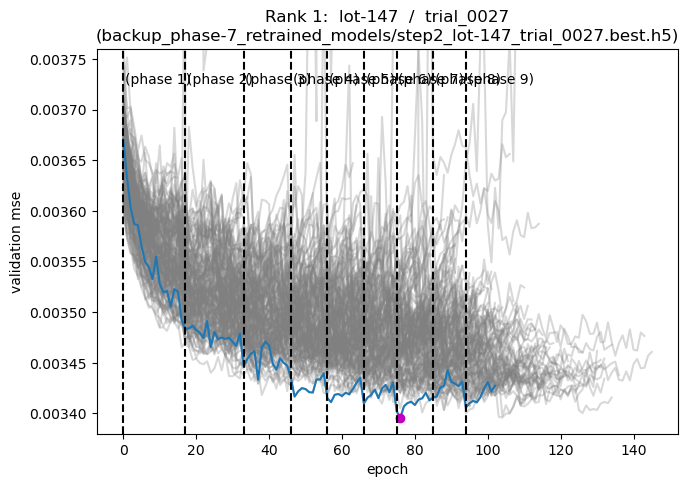

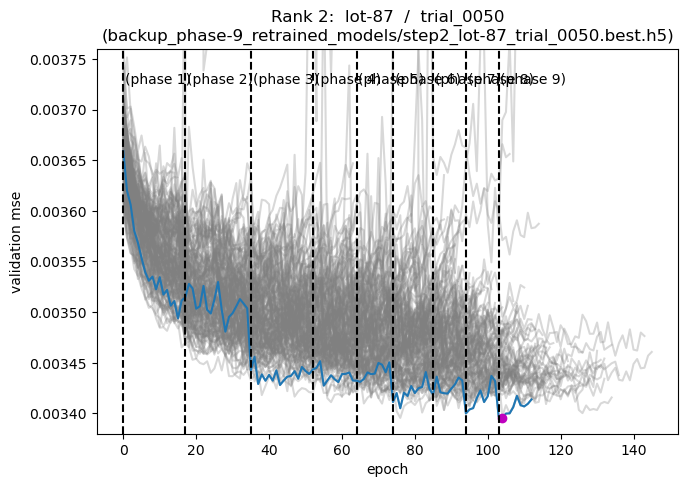

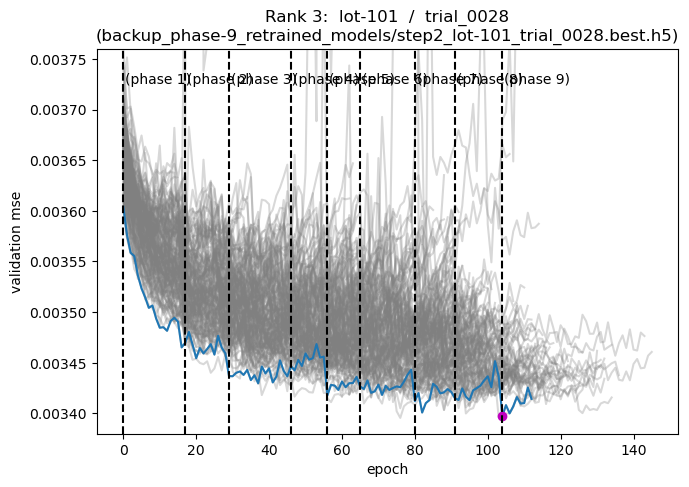

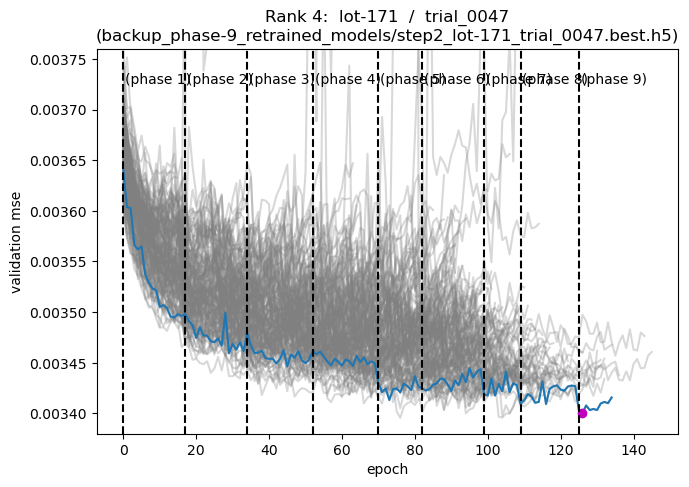

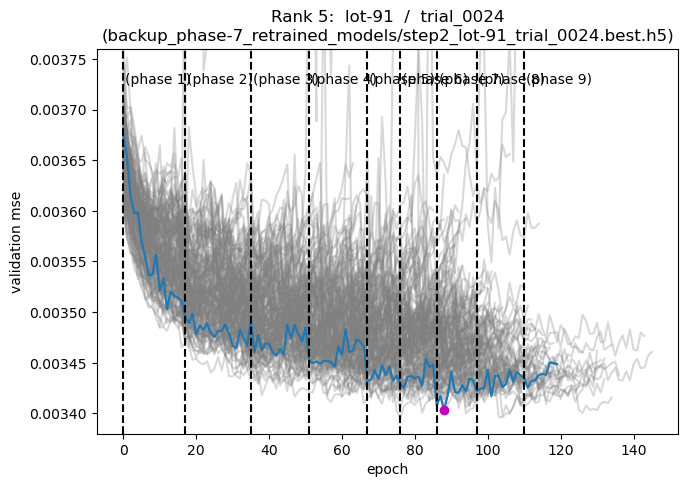

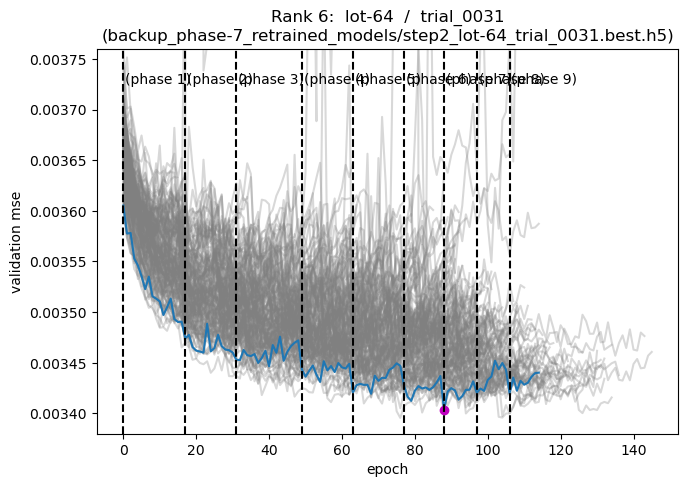

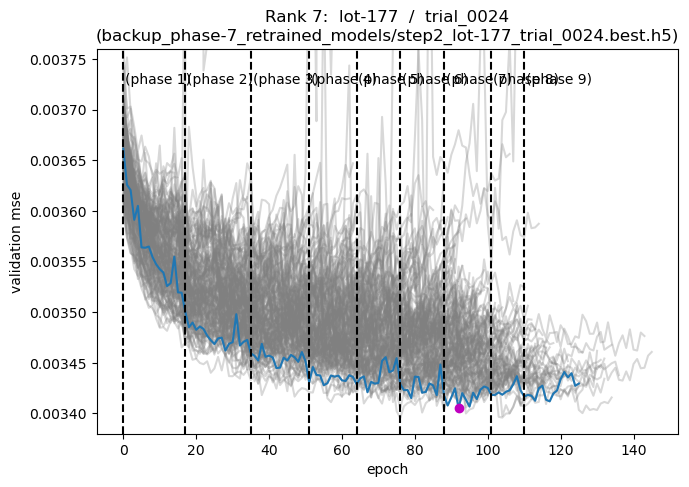

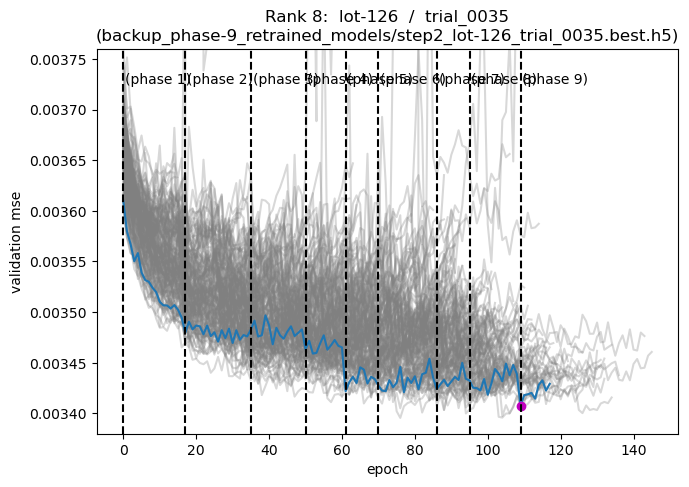

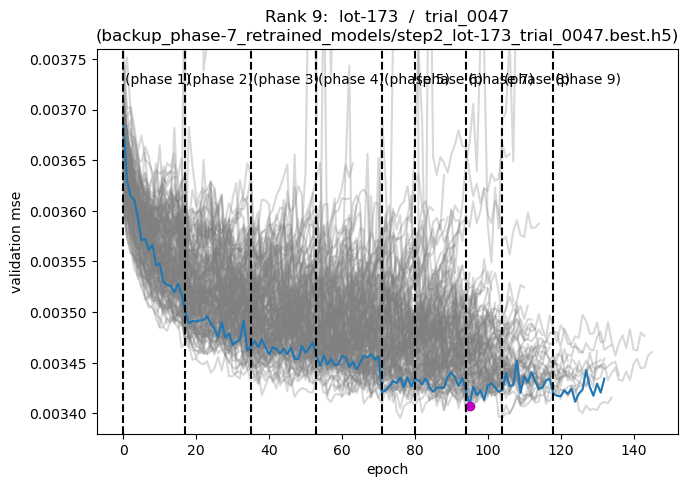

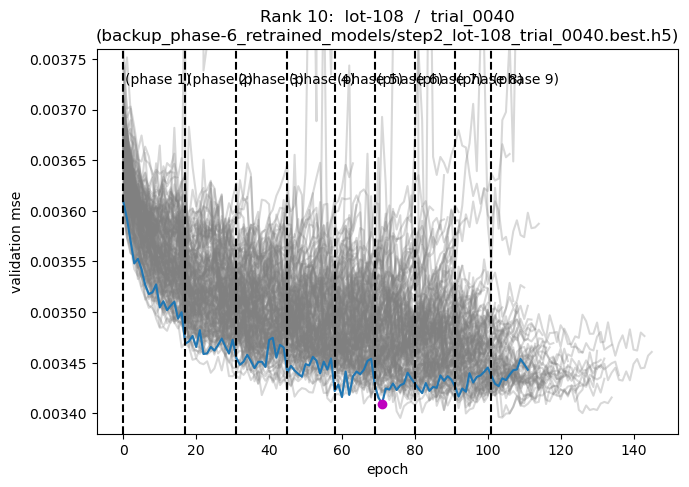

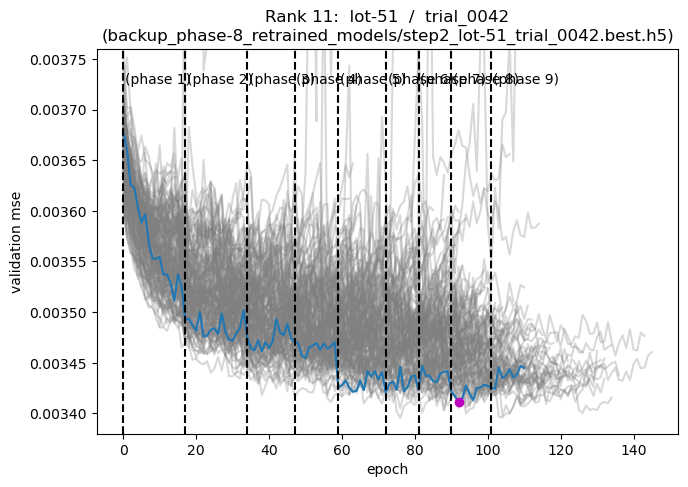

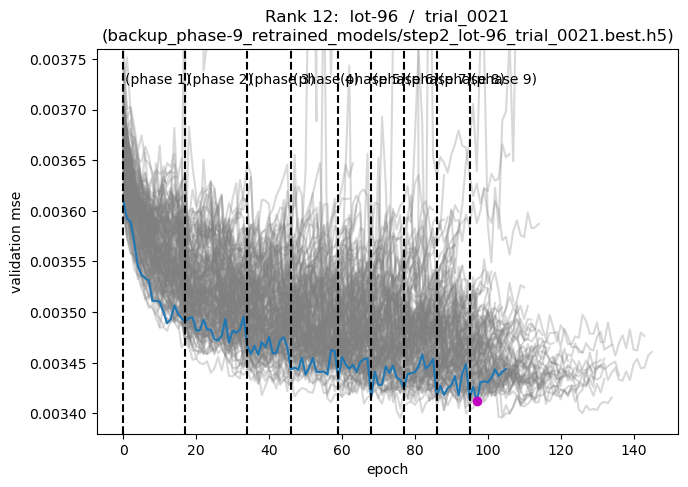

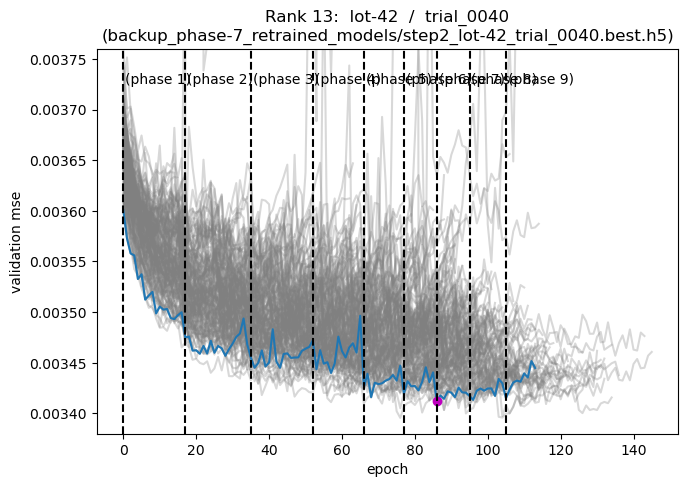

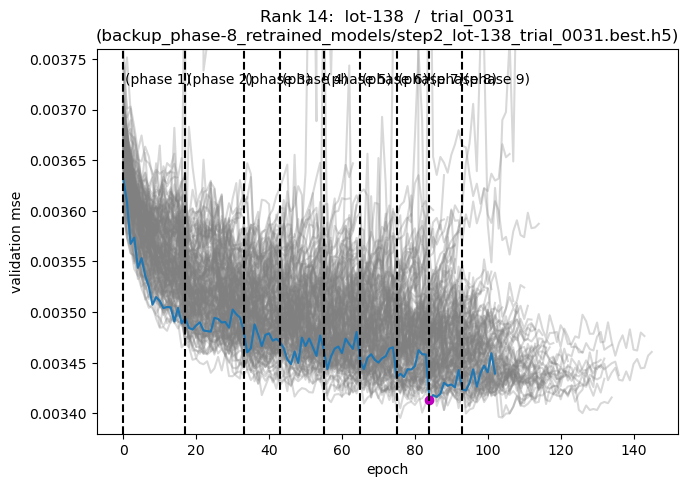

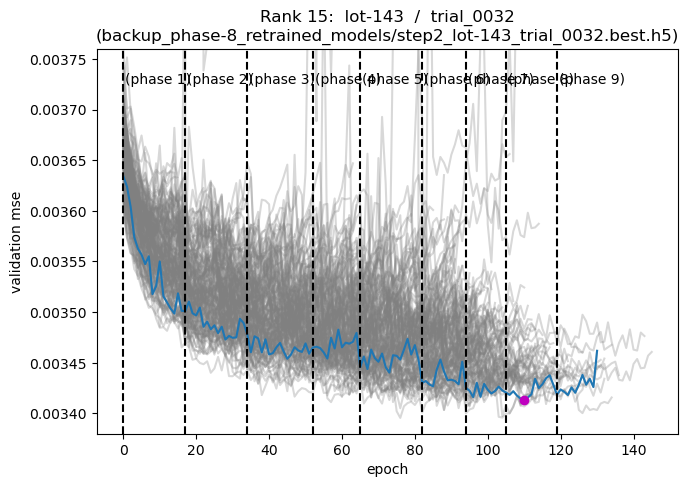

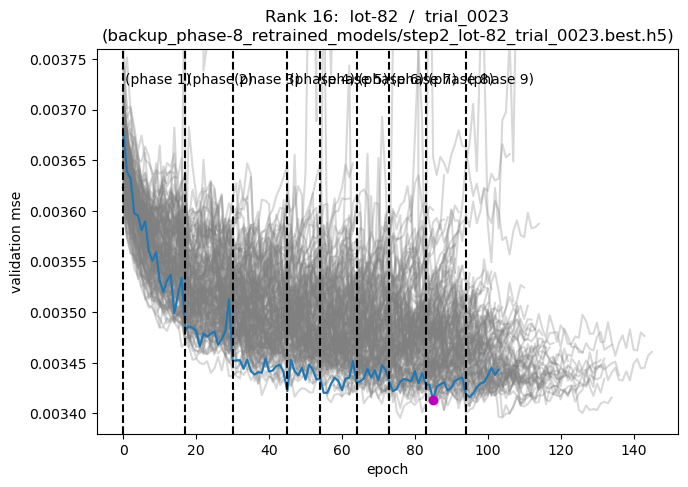

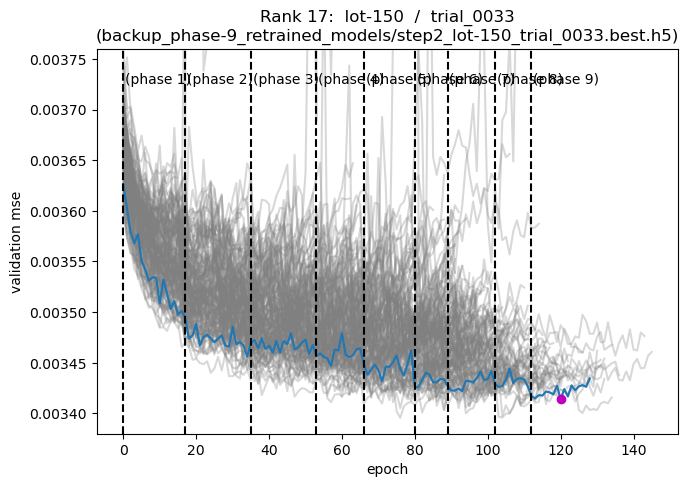

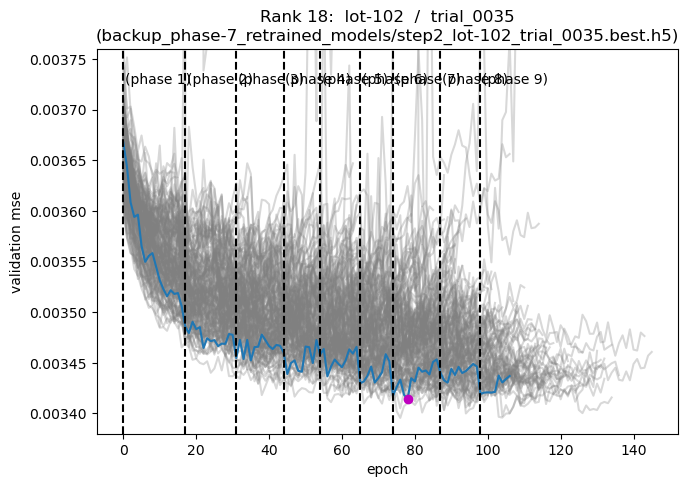

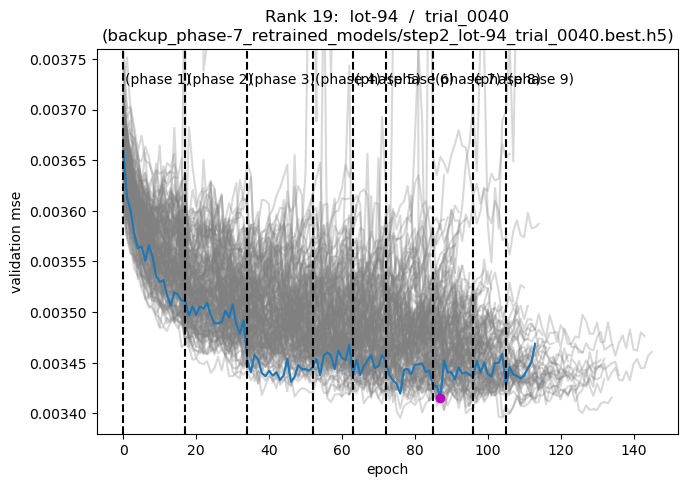

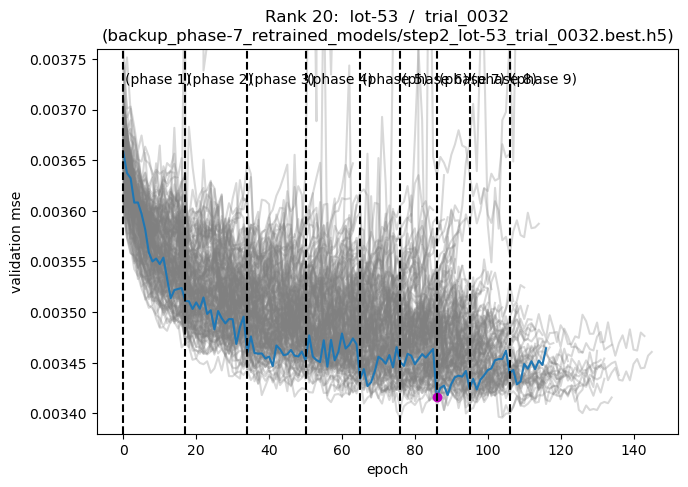

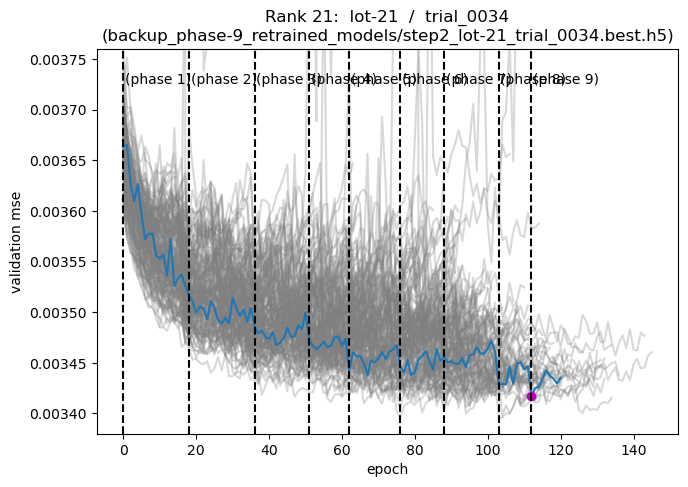

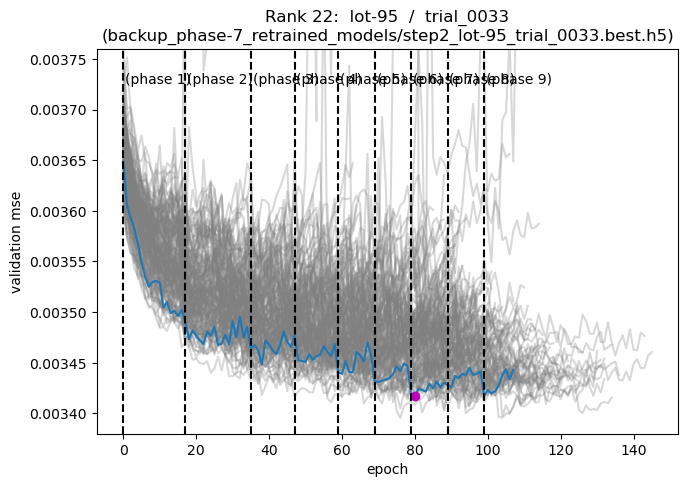

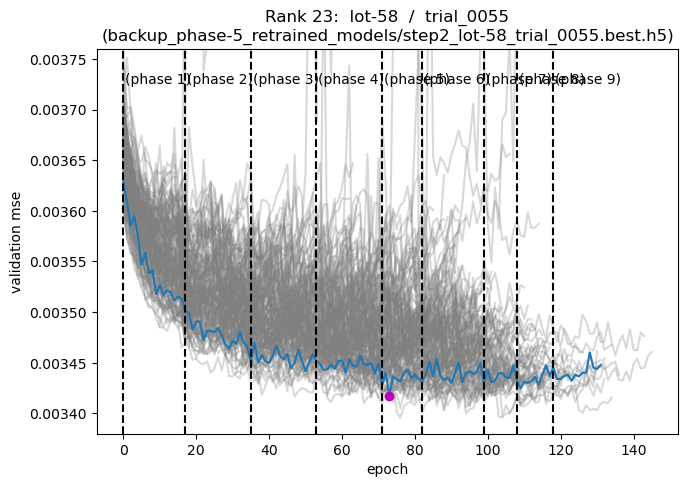

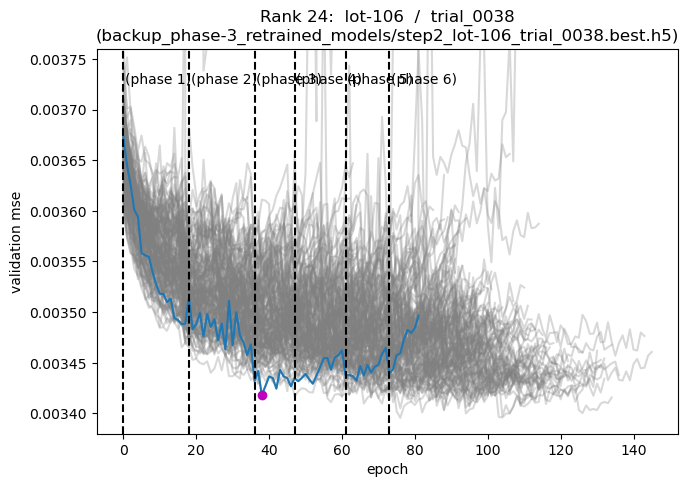

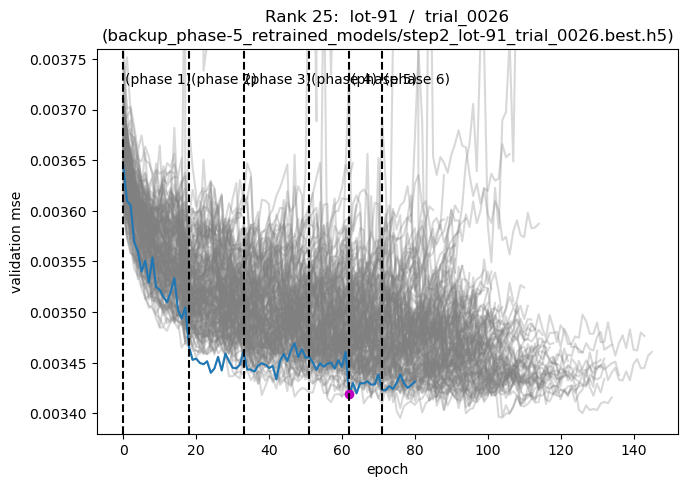

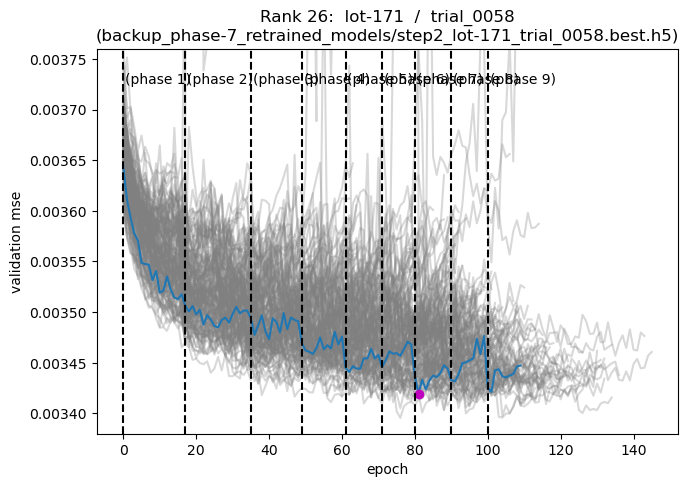

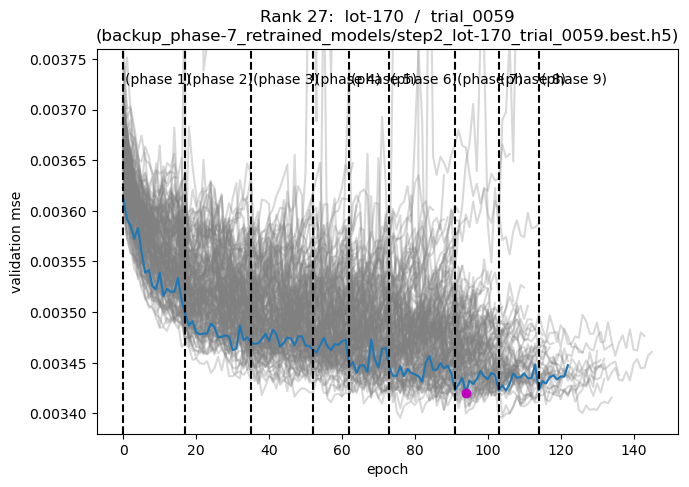

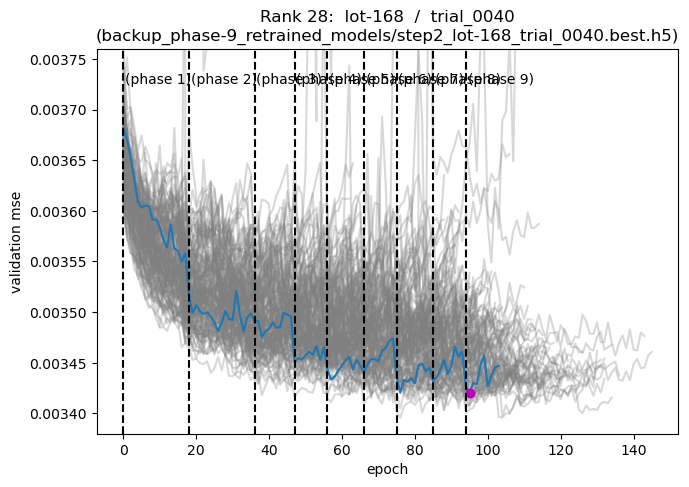

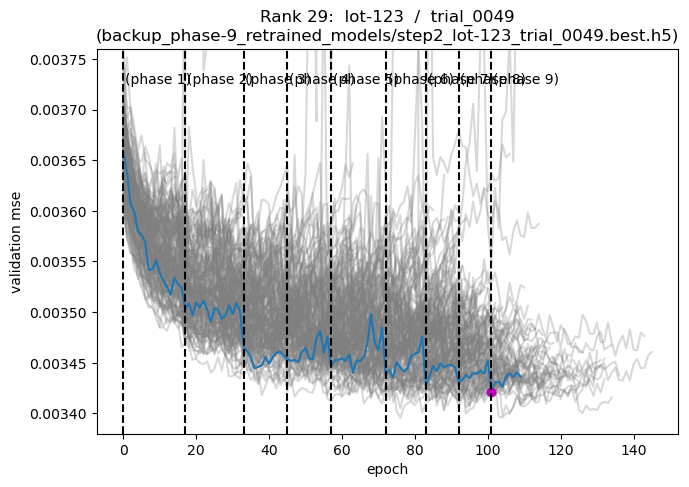

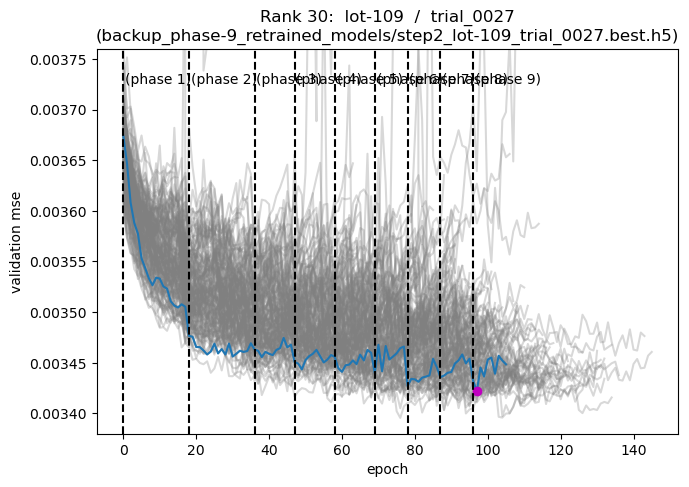

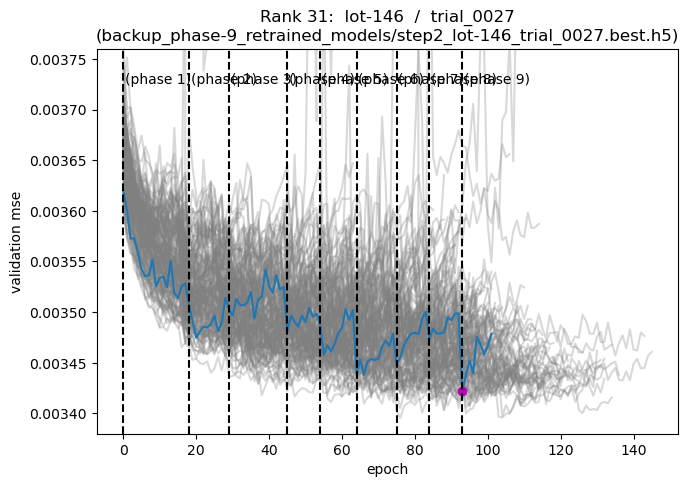

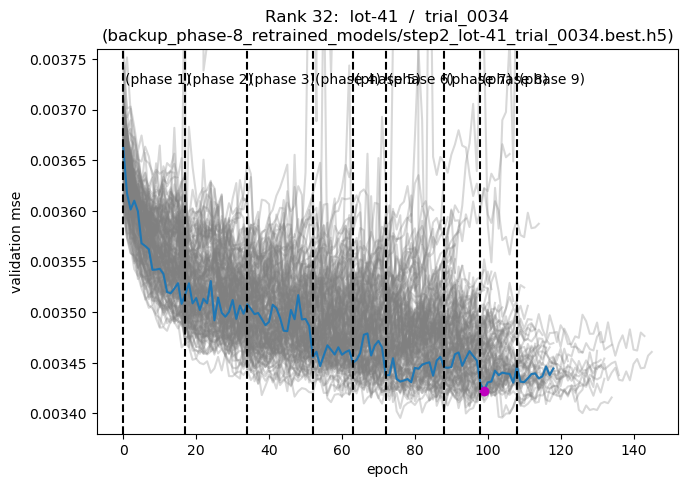

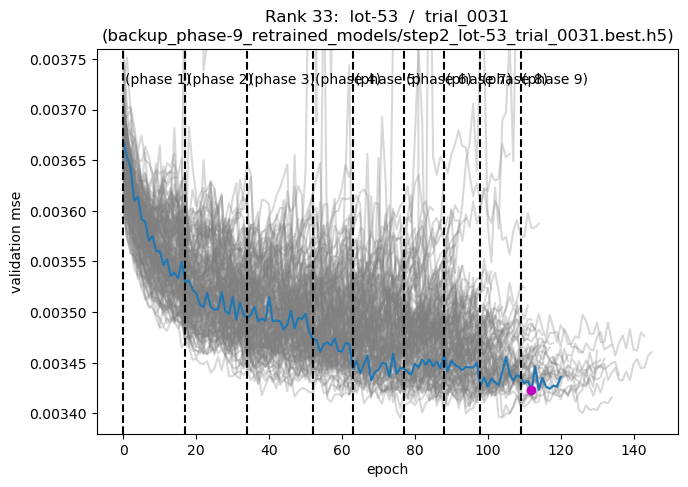

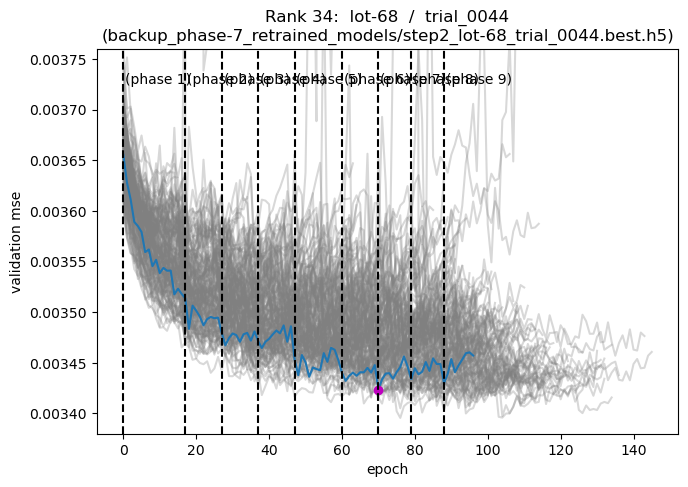

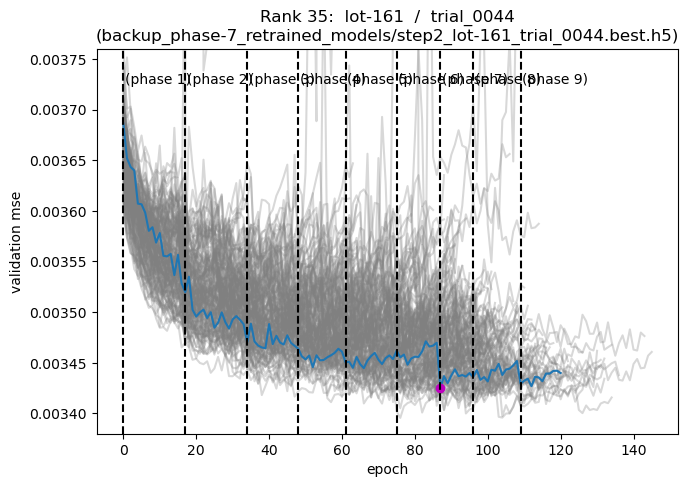

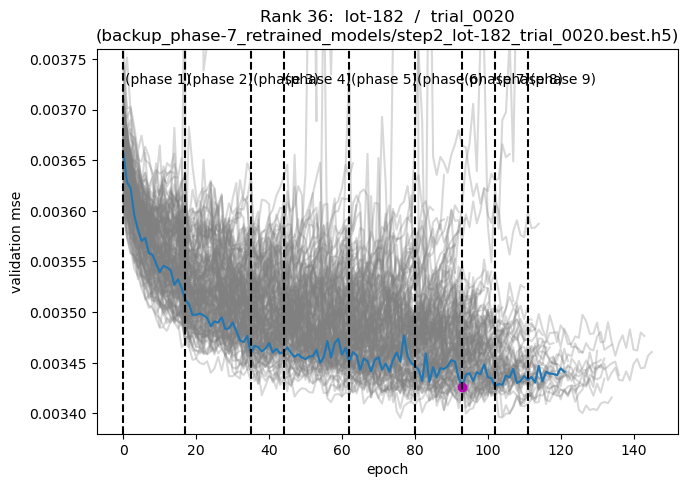

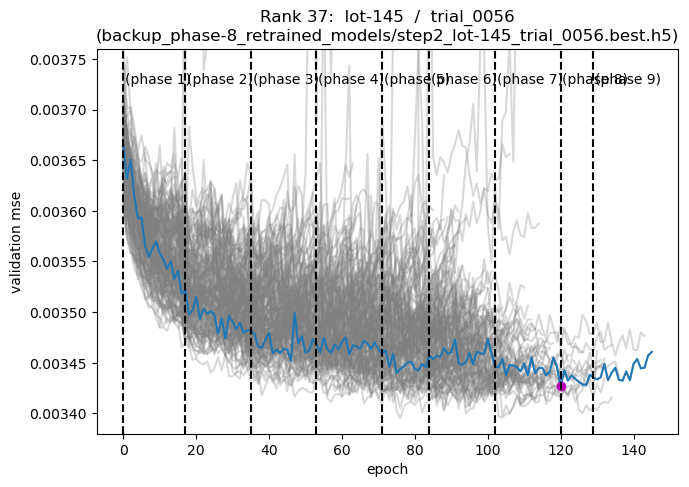

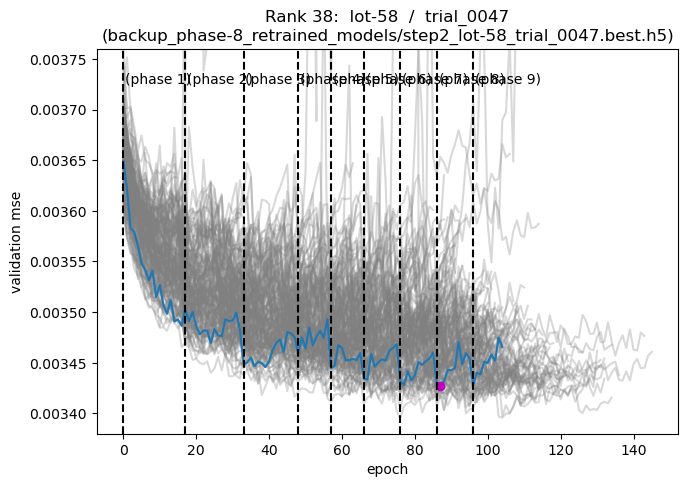

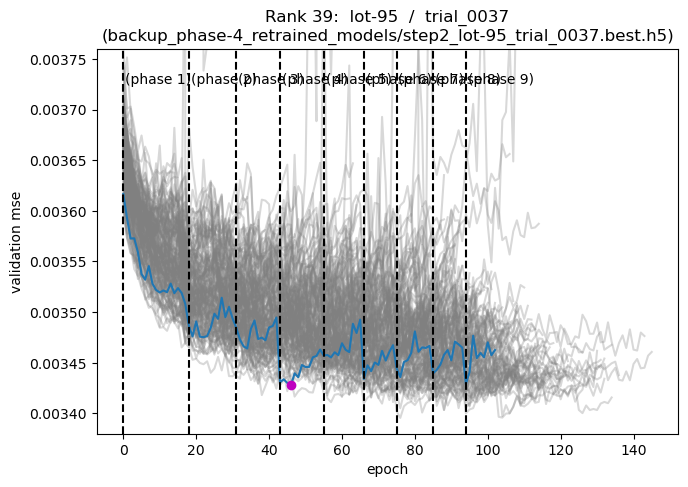

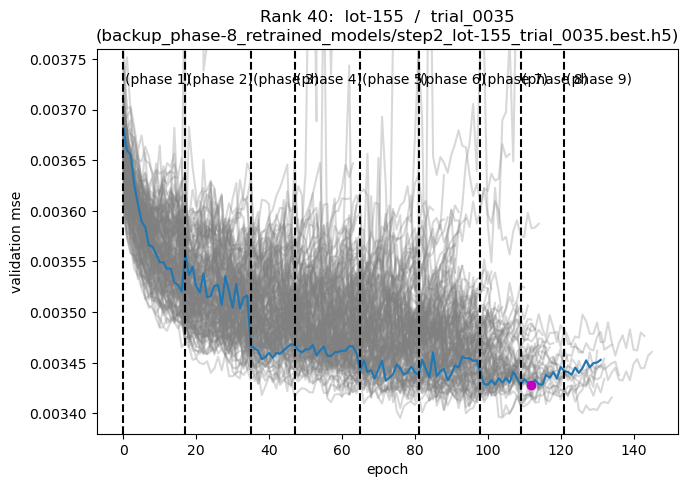

In [28]:
# showing each model individually
# (total trials: 7983)

for krank in range(40):
    
    fig, ax = plt.subplots()
    
    for kgrey in range(len(RESULTS_PD)):
        plotdata_ = RESULTS_PD['val_loss'].iloc[kgrey]
        ax.plot(plotdata_,color='grey',alpha=.3)
    
    plotdata = RESULTS_PD.iloc[krank]
    ax.plot(plotdata['val_loss'],label=k) # line (blue)
    min_epoch = np.argmin(plotdata['val_loss'])
    ax.plot(min_epoch, plotdata['val_loss'][min_epoch],
            marker='o',color='m', ls='none') # dot (magenta)
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    for kstart, ind_resume in enumerate(plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index):
        ax.axvline(ind_resume, color='k', ls='--')
        ax.text(ind_resume+.5, 0.003725, f'(phase {kstart+1})', ha='left')
    
    # which phase?
    which_phase = (plotdata['epoch'].loc[ plotdata['epoch'] ==0 ].index <= min_epoch).sum()
    fn = f"backup_phase-{which_phase}_retrained_models/"+\
         f"step2_{plotdata['lot']}_{plotdata['trial']}.best.h5"
    
    # deco
    
    ax.set_title(f"Rank {krank+1}:  "+
                 f"{plotdata['lot']}  /  {plotdata['trial']}\n"+\
                 f"({fn})")
                 # f"({plotdata['fn'].replace('metrics.csv','best.h5')})")
    ax.set_xlabel('epoch')
    ax.set_ylabel('validation mse')
    ax.set_ylim(0.00338, 0.00376)
    
    fig.set_size_inches(7.5,5)
    
    print(f'Rank{krank+1},\t{fn}')

# inference

In [35]:
from tensorflow import keras
f_input = '/pscratch/sd/s/sungduk/val_input_stride6.npy'
ml_in = np.load(f_input)
f_model = './backup_phase-7_retrained_models/step2_lot-147_trial_0027.best.h5'
model = keras.models.load_model(f_model, compile=False)
model.predict(ml_in)

  207/52560 [..............................] - ETA: 38s   

2023-06-02 10:39:25.317126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


52560/52560 [==============================] - 48s 885us/step


array([[-0.01822294, -0.02451587, -0.02894811, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02063199, -0.01994433, -0.02175923, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01415971, -0.05027103, -0.04156608, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.02815157, -0.0383122 , -0.06453962, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01623429,  0.01870278,  0.04012079, ...,  0.09408951,
         0.15376483,  0.15688536],
       [ 0.01044056, -0.03249047,  0.00072715, ...,  0.01350909,
         0.05881383,  0.07423601]], dtype=float32)

In [46]:
del model